## Machine Learning Home Loan Project

## Eligibility Prediction for Loan
Predict weather loan would be approved or Not

### Context
Dream Housing Finance company deals in all kinds of home loans. They have presence 
across all urban, semi urban and rural areas. Customer first applies for home loan and after 
that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer 
detail provided while filling online application form. These details are Gender, Marital 
Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

To automate this process, they have provided a dataset to identify the customers segments 
that are eligible for loan amount so that they can specifically target these customers.


## Problem Statement
Daily, financial instructions face a huge flock of requests for loans. The process of managing 
and disbursing loans can be very sensitive and tedious given the various factors involved. 
To disburse requested loans to individuals in need, there are a set of criteria set down by 
individual financial institutions that require the applicants to be qualified to be granted a 
loan. 

The traditional loan management process is meticulous, and time-consuming, and requires 
collecting and verifying information about applicants, their trustworthiness, and their 
credibility. Further, the process involves calculating interest rates and supervising 
payments. 

The sensitivity of the loan process has therefore necessitated the need for strict and 
implementable policies on loan processes such as the efficient and automated method of 
loan management. This system is a digital platform that helps automate every stage of the 
loan lifecycle, from application to closing. Loan servicing software not only automates these 
procedures but also provides useful analytics and insights for lenders and borrowers. 

Unfortunately, for a few countries in developing worlds that are yet to fully integrate the 
electronic loan system, this has therefore led to the implementation of strict measures to be 
followed to ensure that eligibility criteria are critically vetted and the loan is disbursed to 
individuals according to their need and ability to pay back at the stated agreed timeframe.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

#col_pal = sns.color_palette()
#plt.style.use("fivethirtyeight")

In [2]:
#Load the dataframe
df = pd.read_csv("Loan_Data.csv")

In [3]:
# Create a copy of the data to be used for predictions(ML)
df1 = df.copy()

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Check for duplicates
df.duplicated().sum()

0

In [7]:
df.shape

(614, 13)

In [8]:
# Columns
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
#Check for missing values
def missing_values(x):
    return(sum(x.isnull()))

print("Missing values for each column: ")
df.apply(missing_values).where(lambda x: x != 0).dropna()

Missing values for each column: 


Gender              13.0
Married              3.0
Dependents          15.0
Self_Employed       32.0
LoanAmount          22.0
Loan_Amount_Term    14.0
Credit_History      50.0
dtype: float64

In [10]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [14]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

### Visualize to check for outliers

Text(0, 0.5, "Coapplicant's Income")

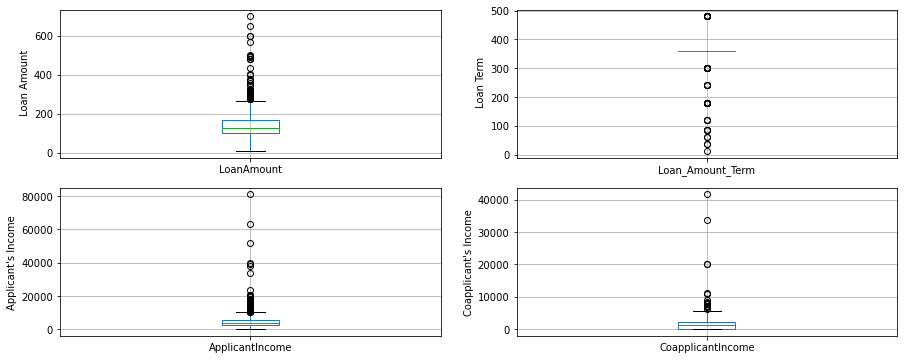

In [15]:
plt.figure(figsize = (15,6))
plt.subplot(2,2,1)
fig = df.boxplot(column = "LoanAmount")
fig.set_ylabel(" Loan Amount")

plt.subplot(2,2,2)
fig = df.boxplot(column = "Loan_Amount_Term")
fig.set_ylabel(" Loan Term")

plt.subplot(2,2,3)
fig = df.boxplot(column = "ApplicantIncome")
fig.set_ylabel("Applicant's Income")

plt.subplot(2,2,4)
fig = df.boxplot(column = "CoapplicantIncome")
fig.set_ylabel("Coapplicant's Income")


In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR =  q3 - q1
upper_q = q3 + (1.5 * IQR)
lower_q = q1 - (1.5 * IQR)

In [17]:
dfnum_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [18]:
#Upper and lower quartiles
print(upper_q)
print(lower_q)

ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             270.000
Loan_Amount_Term       360.000
Credit_History           1.000
dtype: float64
ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount             -2.000
Loan_Amount_Term      360.000
Credit_History          1.000
dtype: float64


In [19]:
#Checking the size and proportion of outliers in the respective columns
print("Outliers, Applicant Income: ", (len(df.ApplicantIncome[df.ApplicantIncome > 10171.250]) + len(df.ApplicantIncome[df.ApplicantIncome < -1498.750]))/len(df)*100, "%")
print("Outliers, Coapplicant Income: ", (len(df.CoapplicantIncome[df.ApplicantIncome > 5743.125]) + len(df.CoapplicantIncome[df.CoapplicantIncome < -3445.875]))/len(df)*100, "%")
print("Outliers, Loan Amount: ", (len(df.LoanAmount[df.LoanAmount >  261.500]) + len(df.LoanAmount[df.LoanAmount < 3.500]))/len(df)*100, "%")
print("Outliers, Loan Term: ", (len(df.Loan_Amount_Term [df.Loan_Amount_Term  > 360]) + len(df.Loan_Amount_Term [df.Loan_Amount_Term  < 360]))/len(df)*100, "%")

Outliers, Applicant Income:  8.143322475570033 %
Outliers, Coapplicant Income:  25.570032573289904 %
Outliers, Loan Amount:  6.677524429967427 %
Outliers, Loan Term:  14.332247557003258 %


- The percentage of outliers in different columns are many, removing them or replacing would have a negative effect on our analysis and predictions since the case is for loans it varies with different clients which is sensible.
- There are outliers on the four columns thus it is best to fill the missing values with median and mode depending on the column.

In [20]:
# Fill in for missing values
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
# Remove unnecessary columns
df.drop(["Loan_ID"], axis = 1, inplace = True)

In [23]:
#Statistical description of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Text(0.5, 1.0, 'Comparison between males and females')

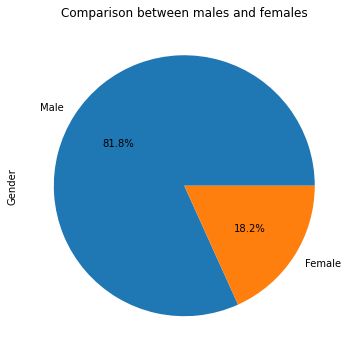

In [24]:
# Proportion of males and females applying for the home loan
plt.figure(figsize = (10,6))
df["Gender"].value_counts().plot(kind = "pie", autopct ='%1.1f%%')
plt.title("Comparison between males and females")

The larger part of the population that applied for the home loan were men

<AxesSubplot:xlabel='Gender,Loan_Status'>

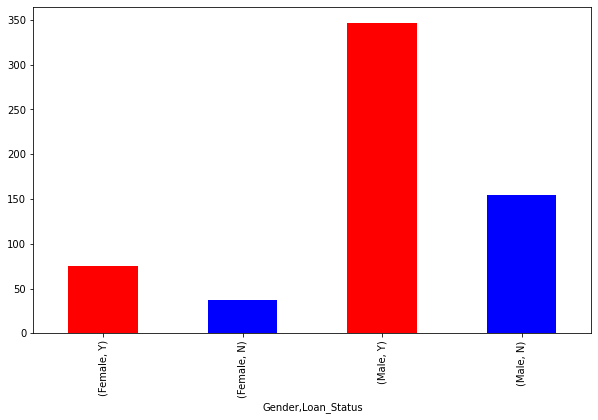

In [25]:
#Loan status by gender
plt.figure(figsize = (10,6))
df.groupby(["Gender"])[["Loan_Status"]].value_counts().plot(kind = "bar", color = ["red", "blue"])

<AxesSubplot:xlabel='Married,Loan_Status'>

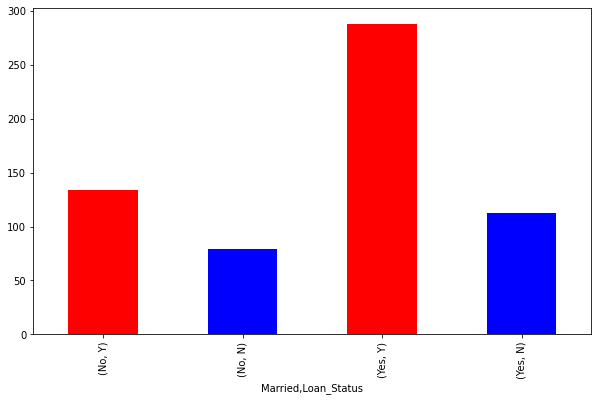

In [26]:
# Married and Loan status distribution
plt.figure(figsize = (10,6))
df.groupby("Married")[["Loan_Status"]].value_counts().plot(kind = 'bar',color = ["Red", "Blue"])

Married people apply for a home loan more compared to the unmarried, most are approved.

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64


Text(0.5, 1.0, "Client's Dependents by percentage")

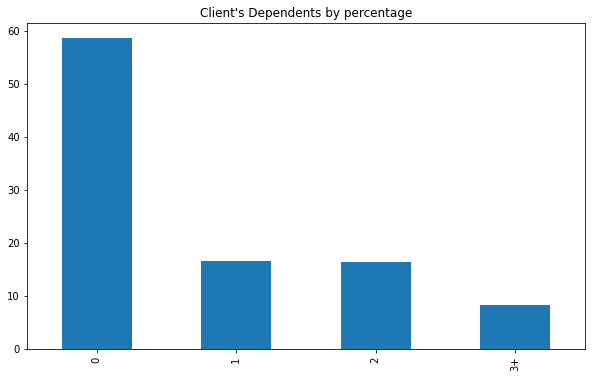

In [27]:
# Client's dependents
print(df["Dependents"].value_counts(normalize = True) * 100)
plt.figure(figsize = (10,6))
(df["Dependents"].value_counts(normalize = True) * 100).plot(kind = 'bar');
plt.title("Client's Dependents by percentage")

Majority of the home loan applicants do not have dependents; about 58% of the applicants. Only few clients with three or more dependents take home loans.

Text(0.5, 1.0, "Loan Status depending on the client's dependents")

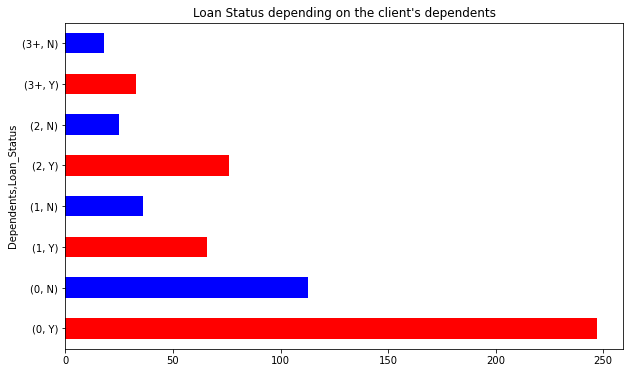

In [28]:
# Relationship between dependents and loan status
plt.figure(figsize = (10, 6))
df.groupby("Dependents")[["Loan_Status"]].value_counts().plot(kind = "barh", color = ["Red", "Blue"])
plt.title("Loan Status depending on the client's dependents")

Most clients applying for home loans have no dependents, with most of them being approved for the loan.

<AxesSubplot:ylabel='Education'>

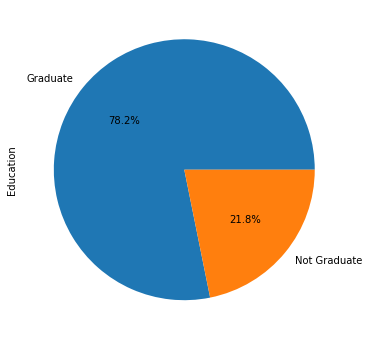

In [29]:
# Education Level of the homeloan applicants
plt.figure(figsize = (10,6))
df["Education"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

More than three- quarters of the clients are graduates

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
dtype: int64


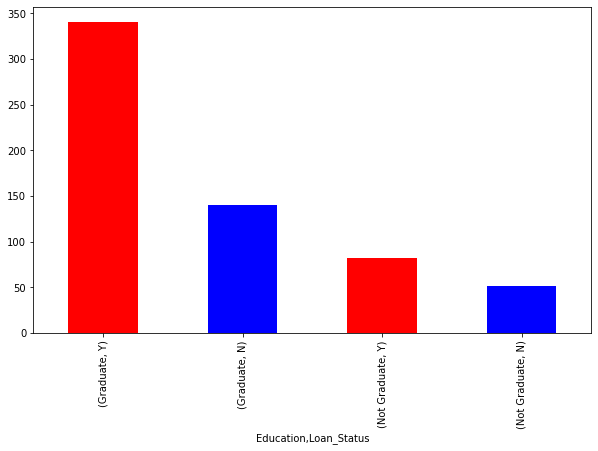

In [30]:
# A view of how education impacts loan borrowing
plt.figure(figsize = (10,6))
print(df.groupby("Education")[["Loan_Status"]].value_counts())
df.groupby("Education")[["Loan_Status"]].value_counts().plot(kind = "bar", color = ["red", "blue"]);

Graduates tend to apply for more home loans compared to non-graduates. Although more graduates apply for the loan, a larger portion of Non-Graduates are approved for the home loan compared to the graduates.

Self_Employed  Loan_Status
No             Y              366
               N              166
Yes            Y               56
               N               26
dtype: int64


Text(0.5, 1.0, 'Self Employed and Non Self Employed by Loan Status')

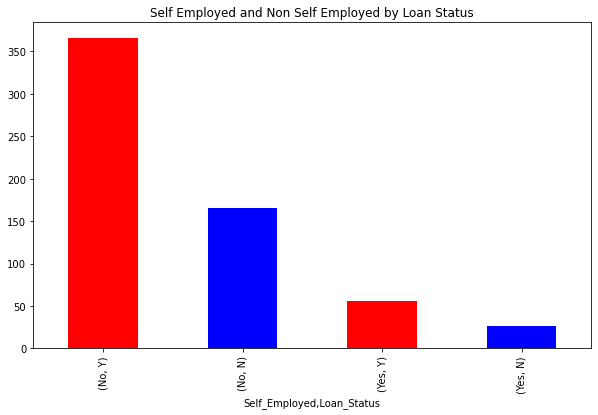

In [31]:
# Employment status
plt.figure(figsize = (10, 6))
print(df.groupby(["Self_Employed"])[["Loan_Status"]].value_counts())
df.groupby(["Self_Employed"])[["Loan_Status"]].value_counts().plot(kind = "bar", color = ["Red", "Blue"]);
plt.title("Self Employed and Non Self Employed by Loan Status")

Self employed people tend to take home loans less as compared to the non - self employed.

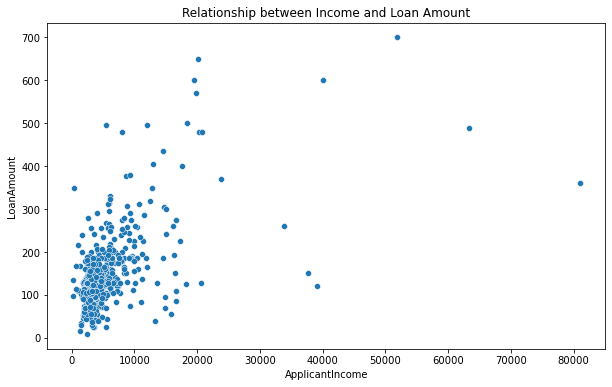

In [32]:
# Relationship between the applicant's income and Loan amount
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df.ApplicantIncome, y = df.LoanAmount)
plt.title("Relationship between Income and Loan Amount")
plt.show()

Most of the clients applying for home loans have a low income( below 20,000).Most qualify for a low amount of loan. High income people are applying less for the home loan.

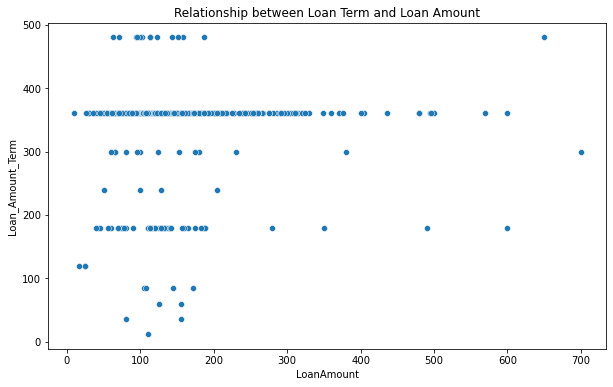

In [33]:
# Relationship between the Loan amount and Loan term
plt.figure(figsize = (10, 6))
sns.scatterplot(y = df.Loan_Amount_Term , x = df.LoanAmount)
plt.title("Relationship between Loan Term and Loan Amount")
plt.show()

Applicants with same loan term may qualify for different loan amounts

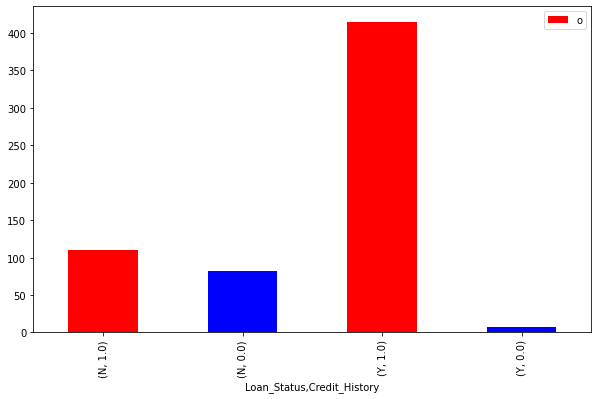

In [34]:
# Are loans approved based on a client's credit history
plt.figure(figsize = (10,6))
df.groupby("Loan_Status")[["Credit_History"]].value_counts().plot(kind = "bar", color = ["red", "Blue"])
plt.legend("off")

Clients who have a credit history of 1.0 are likely to be approved for  a home loan.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


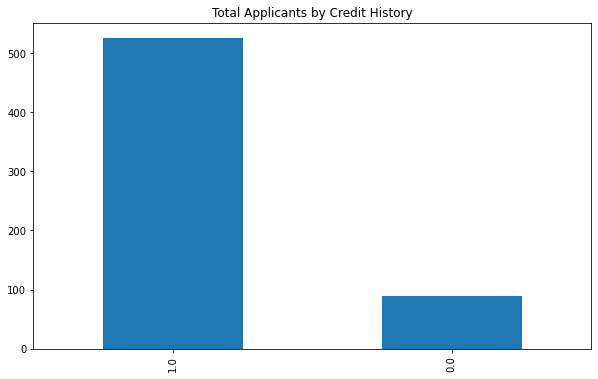

In [35]:
# General view of clients applying for the home loan credit history
plt.figure(figsize = (10,6))
print(df["Credit_History"].value_counts())
df["Credit_History"].value_counts().plot(kind = "bar")
plt.title("Total Applicants by Credit History")
plt.show()

Most clients applying for the home loan have a credit history of 1.0.

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
dtype: int64


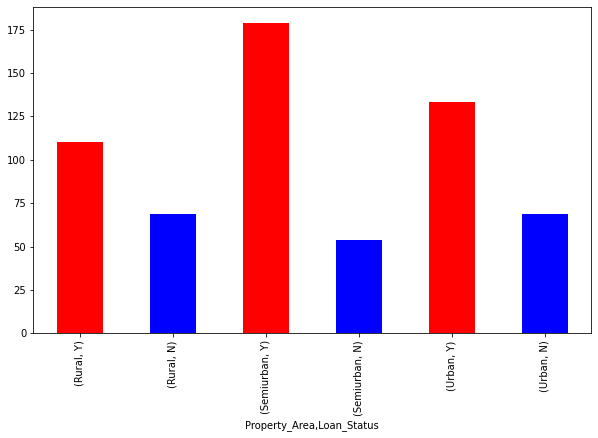

In [36]:
# Loan status and the applicant's property area
plt.figure(figsize = (10,6))
print(df.groupby("Property_Area")[["Loan_Status"]].value_counts())
df.groupby("Property_Area")[["Loan_Status"]].value_counts().plot(kind = "bar", color = ["red", "blue"]);
plt.show()

Most home loan applicants are in the semi urban area, with most of them being approved for loans.

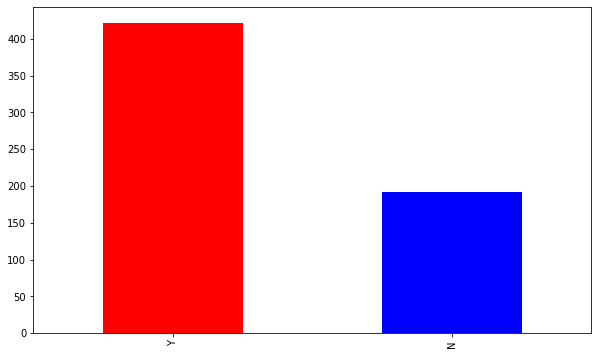

In [37]:
# Are applications approved or rejected for their loans
plt.figure(figsize = (10,6))
df["Loan_Status"].value_counts().plot(kind = "bar", color = ["red", "blue"])
plt.show()

In [38]:
# General home loan Approval
Approved =round((len(df.loc[df['Loan_Status']=="Y"])/ len(df["Loan_Status"]) * 100), 2)
Rejected = round((len(df.loc[df['Loan_Status']=="N"])/ len(df["Loan_Status"]) * 100), 2)

print(Approved  , "% of applicants are approved for the home loan")
print(Rejected  , "% of applicants are  not approved for the home loan")

68.73 % of applicants are approved for the home loan
31.27 % of applicants are  not approved for the home loan


About 1/3 of the clients applying for the home loan have not been approved.

In [39]:
# Correlation between the numerical values
cor = df.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

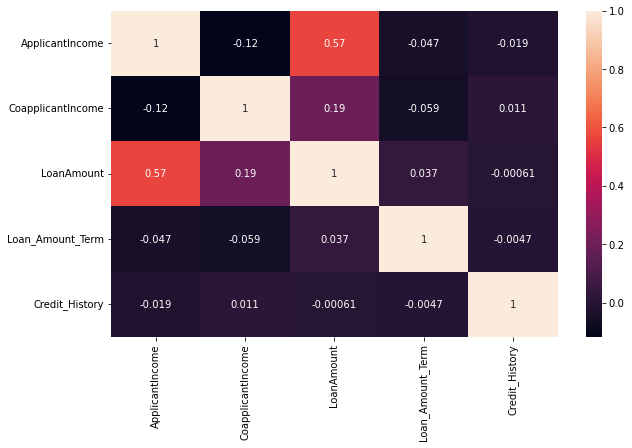

In [40]:
# A visual of the correlations
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

There is a negative correlation between most of the variables which shows an inverse relationship. There is a positive correlation between the loan amount and most of the variables.

# ML Predictions

In [41]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
# Size
df1.shape

(614, 13)

In [43]:
# Columns
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
#Drop unnecessary columns
df1.drop("Loan_ID", axis = 1, inplace = True)

In [45]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [47]:
# Target and Features
X = df1.drop("Loan_Status", axis = 1)
y = df1["Loan_Status"]

In [48]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [49]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [50]:
# Split to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [51]:
# Size of the splits
print("The shape of the splits: \n")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape,'\n')
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

The shape of the splits: 

X_train:  (460, 11)
X_test:  (154, 11) 

y_train:  (460,)
y_test:  (154,)


In [52]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [53]:
# Categorical  feature columns
categorical_cols = [var for var in X_train.columns if X_train[var].dtypes == "O"]
print(categorical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [54]:
# Numerical feature columns
numerical_cols = [num for num in X_train.columns if X_train[num].dtypes != "O"]
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [55]:
# Check for missing values
def missing_values(x):
    return(sum(x.isna()))
print("Missing values for the X_test column: \n")

print(X_test.apply(missing_values).where(lambda x: x!= 0).dropna())
print("Missing values for the X_train column: \n")
print(X_train.apply(missing_values).where(lambda x: x != 0).dropna())

Missing values for the X_test column: 

Gender               2.0
Dependents           1.0
Self_Employed        4.0
LoanAmount           2.0
Loan_Amount_Term     3.0
Credit_History      12.0
dtype: float64
Missing values for the X_train column: 

Gender              11.0
Married              3.0
Dependents          14.0
Self_Employed       28.0
LoanAmount          20.0
Loan_Amount_Term    11.0
Credit_History      38.0
dtype: float64


In [56]:
y_train.isna().sum()

0

In [57]:
y_test.isna().sum()

0

In [58]:
# Fill in missing values for categorical columns.
for a in [X_train, X_test]:
    a["Gender"].fillna(X_train["Gender"].mode()[0], inplace=True)
    a["Married"].fillna(X_train["Married"].mode()[0], inplace=True)
    a["Dependents"].fillna(X_train["Dependents"].mode()[0], inplace=True)
    a["Self_Employed"].fillna(X_train["Self_Employed"].mode()[0], inplace=True)

In [59]:
#Filling missing values for numerical columns
for b in [X_train,X_test]:
    b["LoanAmount"].fillna(X_train["LoanAmount"].median(), inplace = True)
    b["Loan_Amount_Term"].fillna(X_train["Loan_Amount_Term"].median(), inplace = True)
    b["Credit_History"].fillna(X_train["Credit_History"].mode()[0], inplace = True)

In [60]:
# Check for missing values after filling them:
def missing_values(x):
    return(sum(x.isna()))
            
print("Missing values for the X_test column: \n")

print(X_test.apply(missing_values).where(lambda x: x!= 0).dropna())
print("Missing values for the X_train column: \n")
print(X_train.apply(missing_values).where(lambda x: x != 0).dropna())

Missing values for the X_test column: 

Series([], dtype: float64)
Missing values for the X_train column: 

Series([], dtype: float64)


In [61]:
X_train.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
141,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban
290,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban


In [62]:
X_test.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
560,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,360.0,1.0,Rural


In [63]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [64]:
# Unique Values for the categorical columns
for var in categorical_cols:
    print(var, "contains", len(df[var].unique()), "values")


Gender contains 2 values
Married contains 2 values
Dependents contains 4 values
Education contains 2 values
Self_Employed contains 2 values
Property_Area contains 3 values


In [65]:
# Categorical encoding for our binary columns
encoder =ce.BinaryEncoder(cols=['Gender', "Married", "Education", "Self_Employed"])
X_train= encoder.fit_transform(X_train)
X_test= encoder.fit_transform(X_test)

In [66]:
X_train.columns

Index(['Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents',
       'Education_0', 'Education_1', 'Self_Employed_0', 'Self_Employed_1',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [67]:
X_train

,Gender_0,Gender_1,Married_0,Married_1,Dependents,Education_0,Education_1,Self_Employed_0,Self_Employed_1,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,0,1,0,1,1,0,1,0,1,5649,0.0,44.0,360.0,1.0,Urban
272,0,1,1,0,0,0,1,0,1,2833,1857.0,126.0,360.0,1.0,Rural
474,0,1,1,0,2,0,1,0,1,5532,4648.0,162.0,360.0,1.0,Rural
382,1,0,1,0,0,0,1,0,1,6000,0.0,156.0,360.0,1.0,Urban
283,1,0,1,0,0,0,1,0,1,1811,1666.0,54.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,1,0,1,0,0,1,0,1,3103,1300.0,80.0,360.0,1.0,Urban
9,0,1,0,1,1,0,1,0,1,12841,10968.0,349.0,360.0,1.0,Semiurban
359,0,1,0,1,3+,0,1,0,1,5167,3167.0,200.0,360.0,1.0,Semiurban
192,0,1,0,1,0,1,0,0,1,6033,0.0,160.0,360.0,1.0,Urban


In [68]:
#Combining the numerical columns, encoded columns and the encoded non binary columns for the train data
X_train = pd.concat([X_train[numerical_cols],X_train[['Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents',
       'Education_0', 'Education_1', 'Self_Employed_0', 'Self_Employed_1']],
                pd.get_dummies(X_train.Dependents),pd.get_dummies(X_train.Property_Area)], axis = 1)

In [69]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Dependents,...,Education_1,Self_Employed_0,Self_Employed_1,0,1,2,3+,Rural,Semiurban,Urban
46,5649,0.0,44.0,360.0,1.0,0,1,0,1,1,...,1,0,1,0,1,0,0,0,0,1
272,2833,1857.0,126.0,360.0,1.0,0,1,1,0,0,...,1,0,1,1,0,0,0,1,0,0
474,5532,4648.0,162.0,360.0,1.0,0,1,1,0,2,...,1,0,1,0,0,1,0,1,0,0
382,6000,0.0,156.0,360.0,1.0,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
283,1811,1666.0,54.0,360.0,1.0,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,3103,1300.0,80.0,360.0,1.0,0,1,0,1,0,...,1,0,1,1,0,0,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,1,0,1,1,...,1,0,1,0,1,0,0,0,1,0
359,5167,3167.0,200.0,360.0,1.0,0,1,0,1,3+,...,1,0,1,0,0,0,1,0,1,0
192,6033,0.0,160.0,360.0,1.0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [70]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Dependents', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', '0', '1', '2', '3+', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [71]:
X_train.drop("Dependents", axis = 1, inplace = True)

In [72]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', '0', '1', '2', '3+', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [73]:
X_test.columns

Index(['Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents',
       'Education_0', 'Education_1', 'Self_Employed_0', 'Self_Employed_1',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [74]:
#Combining the numerical columns, encoded columns and the encoded non binary columns for test data
X_test = pd.concat([X_test[numerical_cols], X_test[['Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents',
       'Education_0', 'Education_1', 'Self_Employed_0', 'Self_Employed_1']],
        pd.get_dummies(X_test.Dependents),pd.get_dummies(X_test.Property_Area)], axis = 1)

In [75]:
X_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Dependents', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', '0', '1', '2', '3+', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [76]:
#Drop the original Dependents column
X_test.drop("Dependents", axis = 1, inplace = True)

In [77]:
coln = X_test.columns

In [78]:
#Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [79]:
#Create dataframes for train and test data
X_train = pd.DataFrame(X_train, columns = coln)
X_test = pd.DataFrame(X_test, columns = coln)

In [80]:
X_train.sample(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Education_0,Education_1,Self_Employed_0,Self_Employed_1,0,1,2,3+,Rural,Semiurban,Urban
362,0.03812,0.046800,0.122963,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
110,0.06235,0.000000,0.158519,0.72973,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
174,0.03368,0.044928,0.158519,0.72973,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [81]:
X_test.sample(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Education_0,Education_1,Self_Employed_0,Self_Employed_1,0,1,2,3+,Rural,Semiurban,Urban
31,0.114366,0.000000,0.079430,0.743590,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
118,0.050035,0.135946,0.340122,0.743590,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.052975,0.101930,0.317719,0.358974,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Predictive Models

 #### 1. Decision Trees

In [82]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [83]:
#Predictions on test data
y_pred = dt.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N'],
      dtype=object)

In [84]:
# The accuracy of the model
acc = accuracy_score(y_test,y_pred)
print("The accuracy of the model: ", round(acc, 2) * 100, "%")

The accuracy of the model:  81.0 %


In [85]:
#model accuracy metrics for DecisionTreeClassifier
print("Train set score: ", dt.score(X_train,y_train))
print("Test set score: ", dt.score(X_test,y_test))

Train set score:  0.808695652173913
Test set score:  0.8116883116883117


From the initial results the model was overfitting thus we fix this through tuning the hyperparameters to improve its performance.

In [86]:
# Check null accuracy - accuracy acheived if the model keeps on predicting most frequent value
print(y_test.value_counts(), "\n")
null_accuracy = 90 / len(y_test)
print("The accuracy of the model predicting the most frequent value: ",null_accuracy)

Y    111
N     43
Name: Loan_Status, dtype: int64 

The accuracy of the model predicting the most frequent value:  0.5844155844155844


The null accuracy is less than the accuracy of the model, thus the model is not just predicting but it has learnt

In [87]:
#Probability of being approved for loan
y_pred_Yes = dt.predict_proba(X_test)[:,1]
y_pred_Yes

array([0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.05970149, 0.79057592, 0.79057592, 0.05970149, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.05970149,
       0.05970149, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.05970149, 0.05970149,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.05970149, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.79057592, 0.05970149, 0.4       , 0.79057592, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.4       ,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.05970149, 0.79057592, 0.79057592, 0.05970149, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057592,
       0.79057592, 0.79057592, 0.79057592, 0.79057592, 0.79057

#### Evaluating the results

In [88]:
report = classification_report(y_pred, y_test)
cm_dt = confusion_matrix(y_test, y_pred)

print("Classification report: \n")
print("Accuracy: ", acc,"\n")
print(report)
print("Confusion matrix:")
print(cm_dt)

Classification report: 

Accuracy:  0.8116883116883117 

              precision    recall  f1-score   support

           N       0.44      0.79      0.57        24
           Y       0.95      0.82      0.88       130

    accuracy                           0.81       154
   macro avg       0.70      0.80      0.72       154
weighted avg       0.87      0.81      0.83       154

Confusion matrix:
[[ 19  24]
 [  5 106]]


- Precision -Out of all the clients that the model predicted would be approved for loan, 97% were actually approved.
- Recall - Out of all the clients that were actually approved for the loan, the model predicts this outcome correctly for 82% of the clients.
- f1-score - The value is relative close to 1, it tells us that the model does a good job of predicting the clients will get a loan.

In [89]:
# adjusting threshold  AUC and ROC
y_pred_prob_dt = dt.predict_proba(X_test)
y_pred_prob_dt

array([[0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.94029851, 0.05970149],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.94029851, 0.05970149],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.94029851, 0.05970149],
       [0.94029851, 0.05970149],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.20942408, 0.79057592],
       [0.94029851, 0.05970149],
       [0.94029851, 0.05970149],
       [0.

In [90]:
y_pred_prob_dt = pd.DataFrame(data=y_pred_prob_dt, columns=['Probability of not getting a home loan (0)',
                                                         'Probability of not getting home loan (1)'])

y_pred_prob_dt

,Probability of not getting a home loan (0),Probability of not getting home loan (1)
0,0.209424,0.790576
1,0.209424,0.790576
2,0.209424,0.790576
3,0.209424,0.790576
4,0.209424,0.790576
...,...,...
149,0.940299,0.059701
150,0.209424,0.790576
151,0.209424,0.790576
152,0.209424,0.790576


In [91]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_Yes, pos_label='Yes');

C:\Users\gacek\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


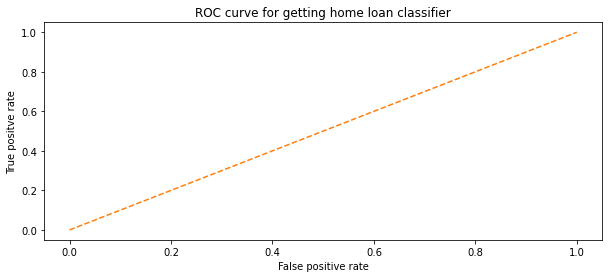

In [92]:
# A visual for the Performance of the classification model
plt.figure(figsize = (10,4))
plt.plot(fpr_dt, tpr_dt, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for getting home loan classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [93]:
# Area Under the curve
ROC_AUC = roc_auc_score(y_test, y_pred_Yes)

print(ROC_AUC)

0.7043787974020532


The AUC is acceptable with the model having a 70. 4% being able to distinguish between the approval or disapproval of the homeloan.

### 2. Logistic Regression

In [94]:
log = LogisticRegression().fit(X_train, y_train)

In [95]:
y_pred_log = log.predict(X_test)

In [96]:
#probability of getting a home loan
y_pred1 = log.predict_proba(X_test)[:,1]
y_pred1

array([0.86617315, 0.86012208, 0.68412883, 0.73217723, 0.84862988,
       0.04846453, 0.75265403, 0.83037383, 0.10277091, 0.80873867,
       0.86244532, 0.7932512 , 0.84262202, 0.82343297, 0.83563878,
       0.70893381, 0.73587102, 0.78415466, 0.79305686, 0.05863627,
       0.09209076, 0.80997025, 0.73039288, 0.71166446, 0.68998173,
       0.76128742, 0.83444026, 0.79301933, 0.18596889, 0.1953791 ,
       0.81235098, 0.66586135, 0.6944772 , 0.67301381, 0.80933494,
       0.08961267, 0.80162156, 0.63394408, 0.82426419, 0.78275228,
       0.79532776, 0.09621256, 0.80076952, 0.57805192, 0.86456295,
       0.71928863, 0.79023879, 0.85999365, 0.63292814, 0.72966295,
       0.80062326, 0.72944106, 0.57557054, 0.73603468, 0.67349802,
       0.78645835, 0.7384176 , 0.64912363, 0.76308139, 0.74583634,
       0.15553752, 0.85209837, 0.62929839, 0.13214572, 0.85034045,
       0.62730912, 0.80064112, 0.84854402, 0.65971735, 0.78530385,
       0.72840013, 0.81815918, 0.61540341, 0.60781842, 0.81358

In [97]:
#Probability of not getting a home loan
y_pred0 = log.predict_proba(X_test)[:,0]
y_pred0

array([0.13382685, 0.13987792, 0.31587117, 0.26782277, 0.15137012,
       0.95153547, 0.24734597, 0.16962617, 0.89722909, 0.19126133,
       0.13755468, 0.2067488 , 0.15737798, 0.17656703, 0.16436122,
       0.29106619, 0.26412898, 0.21584534, 0.20694314, 0.94136373,
       0.90790924, 0.19002975, 0.26960712, 0.28833554, 0.31001827,
       0.23871258, 0.16555974, 0.20698067, 0.81403111, 0.8046209 ,
       0.18764902, 0.33413865, 0.3055228 , 0.32698619, 0.19066506,
       0.91038733, 0.19837844, 0.36605592, 0.17573581, 0.21724772,
       0.20467224, 0.90378744, 0.19923048, 0.42194808, 0.13543705,
       0.28071137, 0.20976121, 0.14000635, 0.36707186, 0.27033705,
       0.19937674, 0.27055894, 0.42442946, 0.26396532, 0.32650198,
       0.21354165, 0.2615824 , 0.35087637, 0.23691861, 0.25416366,
       0.84446248, 0.14790163, 0.37070161, 0.86785428, 0.14965955,
       0.37269088, 0.19935888, 0.15145598, 0.34028265, 0.21469615,
       0.27159987, 0.18184082, 0.38459659, 0.39218158, 0.18641

In [98]:
# Accuracy of the model
print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_log))

Model accuracy score(test):  0.8311688311688312


In [99]:
#model accuracy metrics for logistic regression
print('Training set score: ', log.score(X_train, y_train))

print('Test set score: ', log.score(X_test, y_test))

Training set score:  0.8021739130434783
Test set score:  0.8311688311688312


The model is just right, it is performing well on the training and the test data.

In [100]:
# Check null accuracy - accuracy acheived if the model keeps on predicting most frequent value
y_test.value_counts()

Y    111
N     43
Name: Loan_Status, dtype: int64

In [101]:
null_accuracy = 90 / len(y_test)
null_accuracy

0.5844155844155844

The null accuracy is less than the actual accuracy of the model thus our model is not just predicting but it has learnt.

In [102]:
# Summarize the performance of the model using a confusion matrix
con_mat = confusion_matrix(y_test, y_pred_log)
con_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

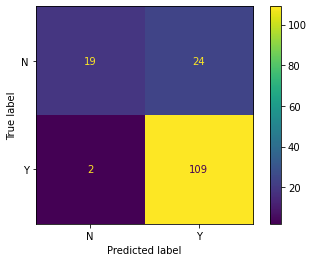

In [103]:
con_d =ConfusionMatrixDisplay(con_mat, display_labels = log.classes_)
con_d.plot()

In [104]:
# Classification Report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           N       0.90      0.44      0.59        43
           Y       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



- Precision -Out of all the clients that the model predicted would be approved for loan, 82% were actually approved.
- Recall - Out of all the clients that were actually approved for the loan, the model predicts this outcome correctly for 98% of the clients.
- f1-score - The value is close to 1 (0.89), it tells us that the model does a good job of predicting the clients will get a loan.

In [105]:
# adjusting threshold  AUC and ROC
y_pred_prob = log.predict_proba(X_test)
y_pred_prob

array([[0.13382685, 0.86617315],
       [0.13987792, 0.86012208],
       [0.31587117, 0.68412883],
       [0.26782277, 0.73217723],
       [0.15137012, 0.84862988],
       [0.95153547, 0.04846453],
       [0.24734597, 0.75265403],
       [0.16962617, 0.83037383],
       [0.89722909, 0.10277091],
       [0.19126133, 0.80873867],
       [0.13755468, 0.86244532],
       [0.2067488 , 0.7932512 ],
       [0.15737798, 0.84262202],
       [0.17656703, 0.82343297],
       [0.16436122, 0.83563878],
       [0.29106619, 0.70893381],
       [0.26412898, 0.73587102],
       [0.21584534, 0.78415466],
       [0.20694314, 0.79305686],
       [0.94136373, 0.05863627],
       [0.90790924, 0.09209076],
       [0.19002975, 0.80997025],
       [0.26960712, 0.73039288],
       [0.28833554, 0.71166446],
       [0.31001827, 0.68998173],
       [0.23871258, 0.76128742],
       [0.16555974, 0.83444026],
       [0.20698067, 0.79301933],
       [0.81403111, 0.18596889],
       [0.8046209 , 0.1953791 ],
       [0.

In [106]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of not getting a home loan (0)',
                                                         'Probability of not getting home loan (1)'])

y_pred_prob_df

,Probability of not getting a home loan (0),Probability of not getting home loan (1)
0,0.133827,0.866173
1,0.139878,0.860122
2,0.315871,0.684129
3,0.267823,0.732177
4,0.151370,0.848630
...,...,...
149,0.814742,0.185258
150,0.199154,0.800846
151,0.253154,0.746846
152,0.205323,0.794677


In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes');

C:\Users\gacek\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


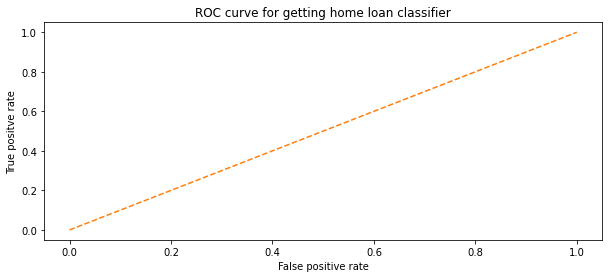

In [108]:
plt.figure(figsize = (10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for getting home loan classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [109]:
# Area Under the curve
ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.7580138277812696


The AUC is acceptable with the model having a 75.8 % being able to distinguish between the approval or disapproval of the homeloan.

### 3. Random Forest Classifier

In [110]:
#Fitting the random forest classifier
rfc = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [111]:
y_pred_rfc = rfc.predict(X_test)

In [112]:
#Accuracy of the model
acc_rfc = accuracy_score(y_test,y_pred_rfc)
acc_rfc

0.8311688311688312

In [113]:
#model accuracy metrics for RandomForestClassifier
print('Training set score: ', rfc.score(X_train, y_train))

print('Test set score: ', rfc.score(X_test, y_test))

Training set score:  0.8021739130434783
Test set score:  0.8311688311688312


The model is performing well on both the training and the test data

#### Evaluating the results.

In [114]:
report_rfc = classification_report(y_pred_rfc, y_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

print("Classification report: \n")
print("Accuracy: ", acc_rfc,"\n")
print(report_rfc)
print("Confusion matrix:")
print(cm_rfc)

Classification report: 

Accuracy:  0.8311688311688312 

              precision    recall  f1-score   support

           N       0.44      0.90      0.59        21
           Y       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

Confusion matrix:
[[ 19  24]
 [  2 109]]


- Precision -Out of all the clients that the model predicted would be approved for loan, 98% were actually approved.
- Recall - Out of all the clients that were actually approved for the loan, the model predicts this outcome correctly for 82% of the clients.
- f1-score - The value is close to 1 (0.89), it tells us that the model does a good job of predicting the clients will get a loan.

In [115]:
# adjusting threshold  AUC and ROC
y_pred_prob_rfc = rfc.predict_proba(X_test)
y_pred_prob_rfc

array([[0.24719477, 0.75280523],
       [0.252176  , 0.747824  ],
       [0.30203978, 0.69796022],
       [0.29072554, 0.70927446],
       [0.26408101, 0.73591899],
       [0.61189214, 0.38810786],
       [0.31175182, 0.68824818],
       [0.26501604, 0.73498396],
       [0.57512749, 0.42487251],
       [0.2790614 , 0.7209386 ],
       [0.24707589, 0.75292411],
       [0.26427197, 0.73572803],
       [0.26119687, 0.73880313],
       [0.29392084, 0.70607916],
       [0.26492017, 0.73507983],
       [0.29093895, 0.70906105],
       [0.29292447, 0.70707553],
       [0.28230168, 0.71769832],
       [0.26853211, 0.73146789],
       [0.6057065 , 0.3942935 ],
       [0.60027388, 0.39972612],
       [0.27496701, 0.72503299],
       [0.28814039, 0.71185961],
       [0.31700822, 0.68299178],
       [0.28625791, 0.71374209],
       [0.29553457, 0.70446543],
       [0.28576042, 0.71423958],
       [0.30542859, 0.69457141],
       [0.52896184, 0.47103816],
       [0.53069286, 0.46930714],
       [0.

In [116]:
y_pred_prob_rfc = pd.DataFrame(data=y_pred_prob_rfc, columns=['Probability of not getting a home loan (0)',
                                                         'Probability of not getting home loan (1)'])

y_pred_prob_rfc

,Probability of not getting a home loan (0),Probability of not getting home loan (1)
0,0.247195,0.752805
1,0.252176,0.747824
2,0.302040,0.697960
3,0.290726,0.709274
4,0.264081,0.735919
...,...,...
149,0.540619,0.459381
150,0.297540,0.702460
151,0.291730,0.708270
152,0.280820,0.719180


In [117]:
y_pred_Yes1 = rfc.predict_proba(X_test)[:,1]
y_pred_Yes1

array([0.75280523, 0.747824  , 0.69796022, 0.70927446, 0.73591899,
       0.38810786, 0.68824818, 0.73498396, 0.42487251, 0.7209386 ,
       0.75292411, 0.73572803, 0.73880313, 0.70607916, 0.73507983,
       0.70906105, 0.70707553, 0.71769832, 0.73146789, 0.3942935 ,
       0.39972612, 0.72503299, 0.71185961, 0.68299178, 0.71374209,
       0.70446543, 0.71423958, 0.69457141, 0.47103816, 0.46930714,
       0.70294166, 0.66703273, 0.7046309 , 0.68952289, 0.7106239 ,
       0.44562137, 0.70730298, 0.66220488, 0.72186257, 0.7015539 ,
       0.73123006, 0.42524843, 0.73711172, 0.66164665, 0.7520913 ,
       0.69305643, 0.71786601, 0.74578829, 0.68859024, 0.70516131,
       0.70566848, 0.7058988 , 0.65193231, 0.70913511, 0.68705097,
       0.69883091, 0.7172696 , 0.66633045, 0.6999523 , 0.70510455,
       0.41056556, 0.73391613, 0.67908847, 0.41806722, 0.72843846,
       0.69340588, 0.71766569, 0.7491043 , 0.67374316, 0.71839172,
       0.71502862, 0.73132681, 0.64258104, 0.66200845, 0.72095

In [118]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_Yes1, pos_label='Yes')

C:\Users\gacek\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


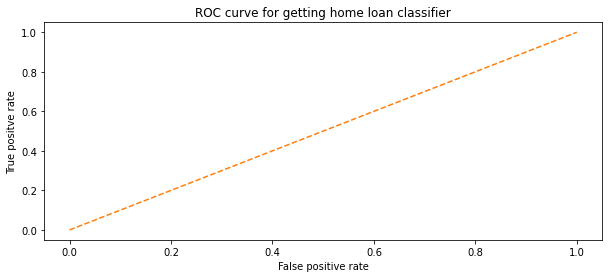

In [119]:
plt.figure(figsize = (10,4))
plt.plot(fpr_rfc, tpr_rfc, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for getting home loan classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [120]:
# Area Under the curve
ROC_AUC = roc_auc_score(y_test,y_pred_Yes1)

print(ROC_AUC)

0.7053216006704379


The AUC is acceptable with the model having a 70. 5% being able to distinguish between the approval or disapproval of the homeloan.

### Limitation

- Athough the Classification report was able to provide a report on the status of a loan being approved, on all our models the classification report was not consistent in the case of predicting home loan not approved for the recall, precision and f1-score.
- In improving our classification report it is observed that most of the methods to improve it are already applied(missing value treatment, feature engineering, hyperparameters tuning, application of different models), on treatment of outliers they wouldn't be removed since different clients have different loan eligibilities.
### Conclusion: 
More data needs to be acquired to increase the sample.